c:\ProgramData\miniconda3\envs\ml_env\lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [1000, 2000] was inferred to Integer(low=1000, high=2000, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(1000, 2000), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\ProgramData\miniconda3\envs\ml_env\lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [1e-06, 0.0001] was inferred to Real(low=1e-06, high=0.0001, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(1e-06, 0.0001), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\ProgramData\miniconda3\envs\ml_env\lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [1000, 2000] was inferred to Integer(low=1000, high=2000, prior='unif

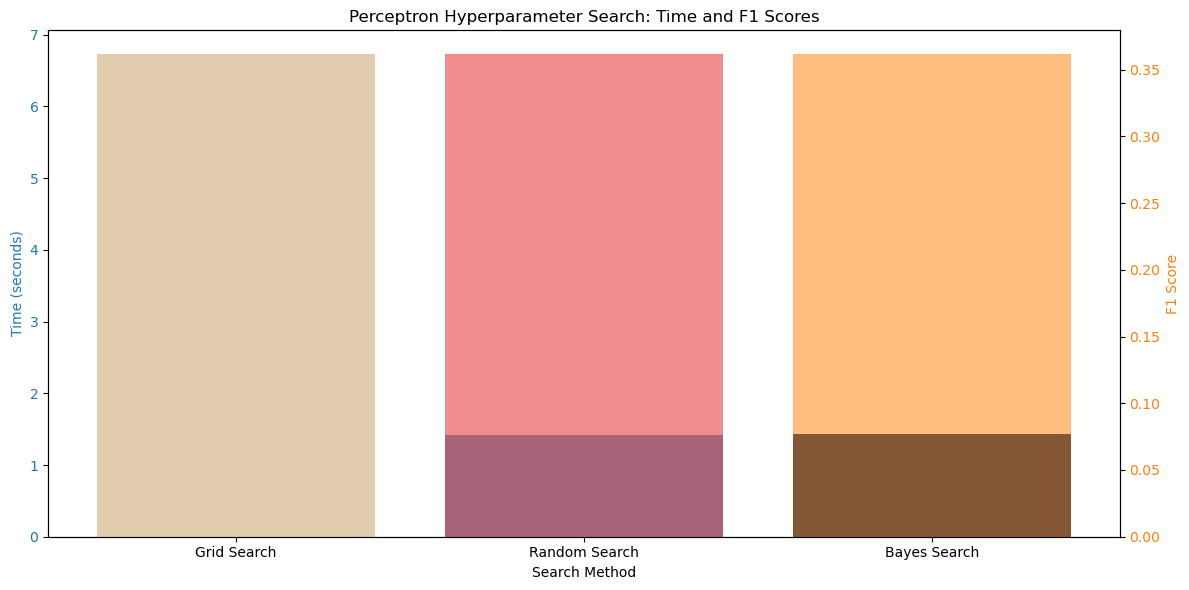

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV

# Load the dataset
file_path = r"C:\Users\Administrator\Documents\ML PROJECT\DATA\prepared_narrowed_all_outliers_dropped.csv"
df = pd.read_csv(file_path)
X = df.drop(columns=['Phase'])
y = df['Phase'] - 1

# Define simplified parameter grid for the Perceptron model
param_grid = [
    {'penalty': ['l2'], 'alpha': [0.0001], 'max_iter': [1000, 2000], 'tol': [1e-6, 1e-4]}
]

# Set the metric for evaluation
scoring = 'f1_macro'

# To store the results
perceptron_results = {
    "grid_search_time": None,
    "grid_search_f1": None,
    "random_search_time": None,
    "random_search_f1": None,
    "bayes_search_time": None,
    "bayes_search_f1": None
}

# Grid Search
start_time = time.time()
grid_search = GridSearchCV(Perceptron(), param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search.fit(X, y)
perceptron_results["grid_search_time"] = time.time() - start_time
perceptron_results["grid_search_f1"] = grid_search.best_score_

# Random Search
random_iter = 4  # Specifically chosen to cover all combinations given the simple grid setup
start_time = time.time()
random_search = RandomizedSearchCV(Perceptron(), param_distributions=param_grid, n_iter=random_iter, scoring=scoring, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X, y)
perceptron_results["random_search_time"] = time.time() - start_time
perceptron_results["random_search_f1"] = random_search.best_score_

# Bayes Search
start_time = time.time()
bayes_search = BayesSearchCV(Perceptron(), param_grid, n_iter=random_iter, scoring=scoring, cv=5, n_jobs=-1, random_state=42)
bayes_search.fit(X, y)
perceptron_results["bayes_search_time"] = time.time() - start_time
perceptron_results["bayes_search_f1"] = bayes_search.best_score_

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Search Method')
ax1.set_ylabel('Time (seconds)', color=color)
ax1.bar(['Grid Search', 'Random Search', 'Bayes Search'], 
        [perceptron_results["grid_search_time"], perceptron_results["random_search_time"], perceptron_results["bayes_search_time"]],
        color=['#c6dbef', '#6baed6', '#08306b'])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('F1 Score', color=color)
ax2.bar(['Grid Search', 'Random Search', 'Bayes Search'], 
        [perceptron_results["grid_search_f1"], perceptron_results["random_search_f1"], perceptron_results["bayes_search_f1"]],
        alpha=0.5, color=['#fdbf6f', '#e31a1c', '#ff7f00'])
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Perceptron Hyperparameter Search: Time and F1 Scores')
fig.tight_layout()
plt.show()

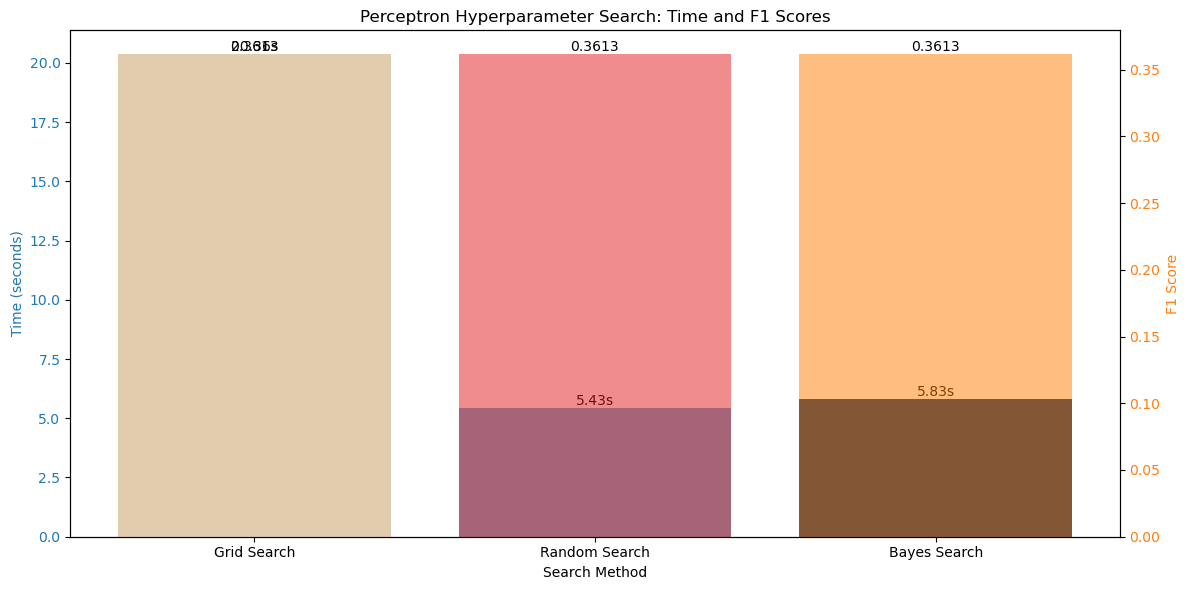

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV

# Load the dataset
file_path = r"C:\Users\Administrator\Documents\ML PROJECT\DATA\prepared_narrowed_all_outliers_dropped.csv"
df = pd.read_csv(file_path)
X = df.drop(columns=['Phase'])
y = df['Phase'] - 1

# Define an explicit parameter grid for the Perceptron model
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'alpha': [0.0001, 0.001, 0.01],  # Variety of regularization strengths
        'max_iter': [500, 1000, 1500, 2000],  # Broad search of iteration counts
        'tol': [1e-4]  # Reasonably fixed tolerance
    }
]

# Set the metric for evaluation
scoring = 'f1_macro'

# To store the results
perceptron_results = {
    "grid_search_time": None,
    "grid_search_f1": None,
    "random_search_time": None,
    "random_search_f1": None,
    "bayes_search_time": None,
    "bayes_search_f1": None
}

# Grid Search
start_time = time.time()
grid_search = GridSearchCV(Perceptron(), param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search.fit(X, y)
perceptron_results["grid_search_time"] = time.time() - start_time
perceptron_results["grid_search_f1"] = grid_search.best_score_

# Random Search
random_iter = 10  # Choose a number of combinations to explore
start_time = time.time()
random_search = RandomizedSearchCV(Perceptron(), param_distributions=param_grid, n_iter=random_iter, scoring=scoring, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X, y)
perceptron_results["random_search_time"] = time.time() - start_time
perceptron_results["random_search_f1"] = random_search.best_score_

# Bayes Search
start_time = time.time()
bayes_search = BayesSearchCV(Perceptron(), param_grid, n_iter=random_iter, scoring=scoring, cv=5, n_jobs=-1, random_state=42)
bayes_search.fit(X, y)
perceptron_results["bayes_search_time"] = time.time() - start_time
perceptron_results["bayes_search_f1"] = bayes_search.best_score_

# Plotting the results with data labels
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Search Method')
ax1.set_ylabel('Time (seconds)', color=color)
time_bars = ax1.bar(['Grid Search', 'Random Search', 'Bayes Search'], 
                    [perceptron_results["grid_search_time"], perceptron_results["random_search_time"], perceptron_results["bayes_search_time"]],
                    color=['#c6dbef', '#6baed6', '#08306b'])
ax1.tick_params(axis='y', labelcolor=color)

for rect in time_bars:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}s', ha='center', va='bottom', fontsize=10)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('F1 Score', color=color)
f1_bars = ax2.bar(['Grid Search', 'Random Search', 'Bayes Search'], 
                  [perceptron_results["grid_search_f1"], perceptron_results["random_search_f1"], perceptron_results["bayes_search_f1"]],
                  alpha=0.5, color=['#fdbf6f', '#e31a1c', '#ff7f00'])
ax2.tick_params(axis='y', labelcolor=color)

for rect in f1_bars:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.title('Perceptron Hyperparameter Search: Time and F1 Scores')
fig.tight_layout()
plt.show()

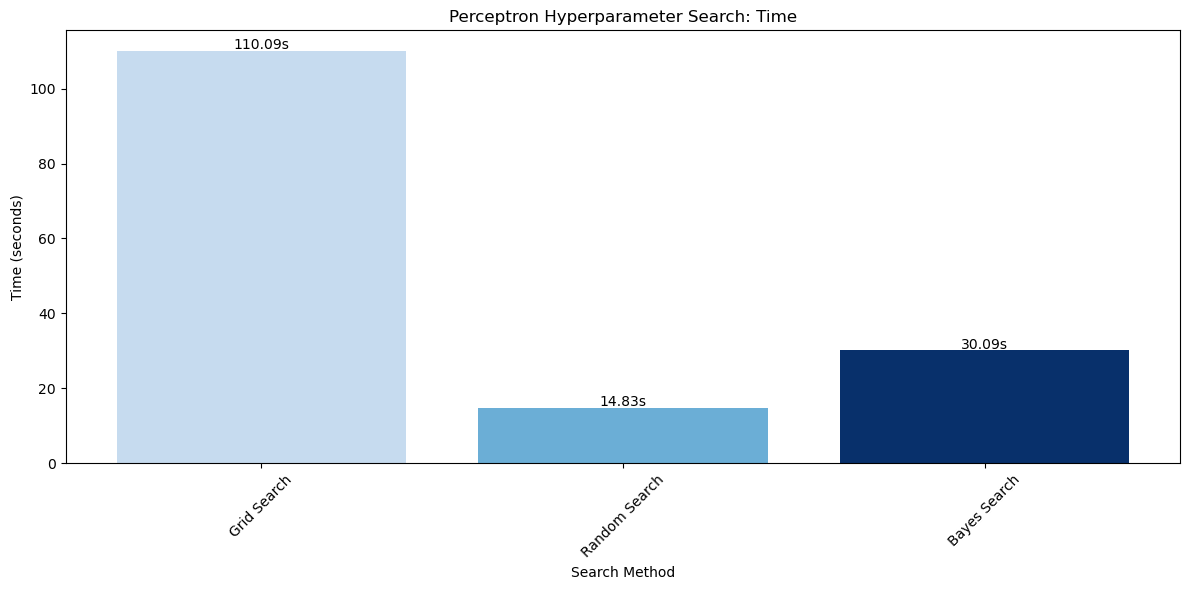

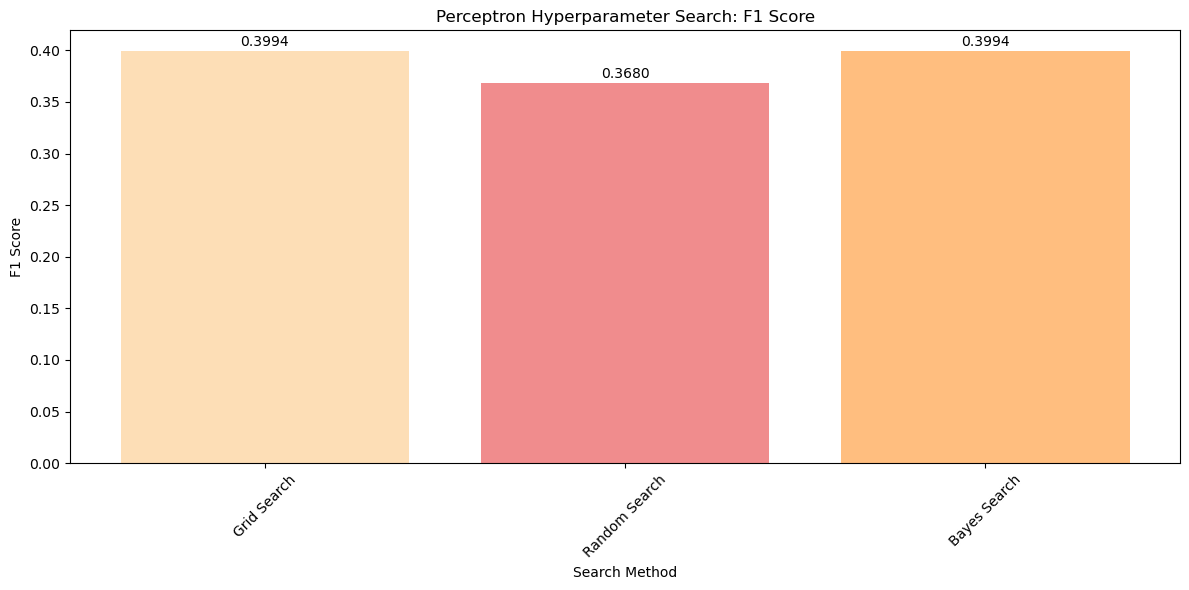

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
import numpy as np

# Load the dataset
file_path = r"C:\Users\Administrator\Documents\ML PROJECT\DATA\prepared_narrowed_all_outliers_dropped.csv"
df = pd.read_csv(file_path)
X = df.drop(columns=['Phase'])
y = df['Phase'] - 1

# Define an expanded parameter grid
param_grid = [
    {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1], 
        'max_iter': [500, 1000, 1500, 2000],
        'tol': [1e-4, 1e-3, 1e-2]
    }
]

# Set the metric for evaluation
scoring = 'f1_macro'

# To store the results
perceptron_results = {
    "grid_search_time": None,
    "grid_search_f1": None,
    "random_search_time": None,
    "random_search_f1": None,
    "bayes_search_time": None,
    "bayes_search_f1": None
}

# Grid Search
start_time = time.time()
grid_search = GridSearchCV(Perceptron(), param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search.fit(X, y)
perceptron_results["grid_search_time"] = time.time() - start_time
perceptron_results["grid_search_f1"] = grid_search.best_score_

# Random Search
random_iter = 20  # Increase number of iterations for wider coverage
start_time = time.time()
random_search = RandomizedSearchCV(Perceptron(), param_distributions=param_grid, n_iter=random_iter, scoring=scoring, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X, y)
perceptron_results["random_search_time"] = time.time() - start_time
perceptron_results["random_search_f1"] = random_search.best_score_

# Bayes Search
start_time = time.time()
bayes_search = BayesSearchCV(Perceptron(), param_grid, n_iter=random_iter, scoring=scoring, cv=5, n_jobs=-1, random_state=42)
bayes_search.fit(X, y)
perceptron_results["bayes_search_time"] = time.time() - start_time
perceptron_results["bayes_search_f1"] = bayes_search.best_score_

# Plotting the results: Time
plt.figure(figsize=(12, 6))
plt.bar(['Grid Search', 'Random Search', 'Bayes Search'], 
        [perceptron_results["grid_search_time"], perceptron_results["random_search_time"], perceptron_results["bayes_search_time"]],
        color=['#c6dbef', '#6baed6', '#08306b'])
plt.xlabel('Search Method')
plt.ylabel('Time (seconds)')
plt.title('Perceptron Hyperparameter Search: Time')
plt.xticks(rotation=45)
for i, v in enumerate([perceptron_results["grid_search_time"], perceptron_results["random_search_time"], perceptron_results["bayes_search_time"]]):
    plt.text(i, v + 0.5, f"{v:.2f}s", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Plotting the results: F1 Score
plt.figure(figsize=(12, 6))
plt.bar(['Grid Search', 'Random Search', 'Bayes Search'], 
        [perceptron_results["grid_search_f1"], perceptron_results["random_search_f1"], perceptron_results["bayes_search_f1"]],
        alpha=0.5, color=['#fdbf6f', '#e31a1c', '#ff7f00'])
plt.xlabel('Search Method')
plt.ylabel('F1 Score')
plt.title('Perceptron Hyperparameter Search: F1 Score')
plt.xticks(rotation=45)
for i, v in enumerate([perceptron_results["grid_search_f1"], perceptron_results["random_search_f1"], perceptron_results["bayes_search_f1"]]):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
import numpy as np

# Load the dataset
file_path = r"C:\Users\Administrator\Documents\ML PROJECT\DATA\prepared_narrowed_all_outliers_dropped.csv"
df = pd.read_csv(file_path)
X = df.drop(columns=['Phase'])
y = df['Phase'] - 1

# Define an expanded parameter grid
param_grid = [
    {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1], 
        'max_iter': [500, 1000, 1500, 2000],
        'tol': [1e-4, 1e-3, 1e-2]
    }
]

# Set the metric for evaluation
scoring = 'f1_macro'

# To store the results
perceptron_results = {
    "grid_search_time": None,
    "grid_search_f1": None,
    "random_search_time": None,
    "random_search_f1": None,
    "bayes_search_time": None,
    "bayes_search_f1": None
}

# Grid Search
start_time = time.time()
grid_search = GridSearchCV(Perceptron(), param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search.fit(X, y)
perceptron_results["grid_search_time"] = time.time() - start_time
perceptron_results["grid_search_f1"] = grid_search.best_score_
grid_best_params = grid_search.best_params_

# Random Search
random_iter = 20  # Increase number of iterations for wider coverage
start_time = time.time()
random_search = RandomizedSearchCV(Perceptron(), param_distributions=param_grid, n_iter=random_iter, scoring=scoring, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X, y)
perceptron_results["random_search_time"] = time.time() - start_time
perceptron_results["random_search_f1"] = random_search.best_score_
random_best_params = random_search.best_params_

# Bayes Search
start_time = time.time()
bayes_search = BayesSearchCV(Perceptron(), param_grid, n_iter=random_iter, scoring=scoring, cv=5, n_jobs=-1, random_state=42)
bayes_search.fit(X, y)
perceptron_results["bayes_search_time"] = time.time() - start_time
perceptron_results["bayes_search_f1"] = bayes_search.best_score_
bayes_best_params = bayes_search.best_params_

# Print best hyperparameters for each search method
print("Best hyperparameters from Grid Search:", grid_best_params)
print("Best hyperparameters from Random Search:", random_best_params)
print("Best hyperparameters from Bayes Search:", bayes_best_params)

# Plotting the results: Time
plt.figure(figsize=(12, 6))
plt.bar(['Grid Search', 'Random Search', 'Bayes Search'], 
        [perceptron_results["grid_search_time"], perceptron_results["random_search_time"], perceptron_results["bayes_search_time"]],
        color=['#c6dbef', '#6baed6', '#08306b'])
plt.xlabel('Search Method')
plt.ylabel('Time (seconds)')
plt.title('Perceptron Hyperparameter Search: Time')
plt.xticks(rotation=45)
for i, v in enumerate([perceptron_results["grid_search_time"], perceptron_results["random_search_time"], perceptron_results["bayes_search_time"]]):
    plt.text(i, v + 0.5, f"{v:.2f}s", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# Plotting the results: F1 Score
plt.figure(figsize=(12, 6))
plt.bar(['Grid Search', 'Random Search', 'Bayes Search'], 
        [perceptron_results["grid_search_f1"], perceptron_results["random_search_f1"], perceptron_results["bayes_search_f1"]],
        alpha=0.5, color=['#fdbf6f', '#e31a1c', '#ff7f00'])
plt.xlabel('Search Method')
plt.ylabel('F1 Score')
plt.title('Perceptron Hyperparameter Search: F1 Score')
plt.xticks(rotation=45)
for i, v in enumerate([perceptron_results["grid_search_f1"], perceptron_results["random_search_f1"], perceptron_results["bayes_search_f1"]]):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()